In [1]:
import pandas as pd
from Bio.SeqIO.FastaIO import SimpleFastaParser
import matplotlib.pyplot as plt

### Read metadata files (deprecated)

In [2]:
# Read NCBI taxonomic annotations
#ncbi = pd.read_table('C:/Users/efrat/Downloads/silva_138_release/Exports/SILVA_138_SSURef_Nr99---tax_ncbi.txt',
#                     header=None,
#                     names=['NCBI_taxon','NCBI_ID','NCBI_rank'])
#print(ncbi.head())

### Read fasta & organize in table

In [3]:
# Read fasta file - convert to lists (takes a few secs)
with open('C:/Users/efrat/Downloads/silva_138_release/Exports/SILVA_138_SSURef_NR99_tax_silva_trunc.fasta') as fasta_file:  # Will close handle cleanly
    identifiers = []
    taxonomy = []
    seqs = []
    lengths = []
    for title, sequence in SimpleFastaParser(fasta_file):
        if "Bacteria" in title:
            title_split = title.split(None, 1)
            identifiers.append(title_split[0])  # First word is ID
            taxonomy.append(title_split[1])
            seqs.append(sequence.replace('\n', ''))
            lengths.append(len(sequence))

print("Read", len(identifiers), "entities from fasta file (bacteria only)")

Read 432033 entities from fasta file (bacteria only)


In [4]:
# Print - just for sanity
print(identifiers[100:105])
print(taxonomy[100:105])
print(lengths[100:105])

['AB002481.1.1500', 'HL283033.1.1470', 'AF524933.1.1566', 'AB004758.1.1445', 'AF538853.1.1438']
['Bacteria;Firmicutes;Bacilli;Lactobacillales;Streptococcaceae;Streptococcus;Streptococcus equinus', 'Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;unidentified', 'Bacteria;Desulfobacterota;Desulfovibrionia;Desulfovibrionales;Desulfonauticaceae;Desulfonauticus;Desulfonauticus submarinus', 'Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Pantoea;Pantoea ananatis', 'Bacteria;Bacteroidota;Bacteroidia;Flavobacteriales;Flavobacteriaceae;Capnocytophaga;Capnocytophaga sp. oral strain P4G_35 P4']
[1500, 1470, 1554, 1445, 1438]


In [5]:
# Collect into a dataframe
fasta_df = pd.DataFrame(list(zip(identifiers, taxonomy, lengths, seqs)), 
                        columns =['raw_id', 'full_taxonomy', 'seq_length', 'seq']) 
fasta_df.head()

,raw_id,full_taxonomy,seq_length,seq
0,HG531388.1.1375,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,1375,AGUCGAGCGGGCGCAGCAAUGCGUCAGCGGCAGACGGGUGAGUAAC...
1,HL281785.3.1301,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,1299,AUUCCGGGAUAGCCUUUCGAAAGAAAGAUUAAUACUGGAUAGCAUA...
2,AB002644.1.1485,Bacteria;Firmicutes;Bacilli;Bacillales;Bacilla...,1485,GGCUAAUACAUGCAAGUCGAGCGAGUGAACAAACAGAAGCCUUCGG...
3,AB002648.1.1383,Bacteria;Firmicutes;Bacilli;Thermoactinomyceta...,1383,AGCGGCGAACGGGUGAGUAACACGNGGGUAACCUGCCCUCAAGACC...
4,JN049459.1.1443,Bacteria;Actinobacteriota;Actinobacteria;Strep...,1443,GACAUGGCGCCUCUACCAUGCAGUCGACGAUGACCACCUUCGGGGU...


In [6]:
# Split taxonomy into levels
fasta_df = fasta_df.join(fasta_df.full_taxonomy.str.split(';', expand=True))
fasta_df.rename(columns={0: 'kingdom', 
                         1: 'phylum', 
                         2: 'class', 
                         3: 'order', 
                         4: 'family', 
                         5: 'genus', 
                         6: 'species', 
                         7: 'strain'}, inplace=True)
fasta_df.head()

#fasta_df[['kingdom','phylum','class','order','family','genus','species','strain']] = fasta_df.full_taxonomy.str.split(expand=True, pat=';')

,raw_id,full_taxonomy,seq_length,seq,kingdom,phylum,class,order,family,genus,species,strain
0,HG531388.1.1375,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,1375,AGUCGAGCGGGCGCAGCAAUGCGUCAGCGGCAGACGGGUGAGUAAC...,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Xanthobacteraceae,Rhodoplanes,Rhodoplanes oryzae,None
1,HL281785.3.1301,Bacteria;Bacteroidota;Bacteroidia;Bacteroidale...,1299,AUUCCGGGAUAGCCUUUCGAAAGAAAGAUUAAUACUGGAUAGCAUA...,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,unidentified,None
2,AB002644.1.1485,Bacteria;Firmicutes;Bacilli;Bacillales;Bacilla...,1485,GGCUAAUACAUGCAAGUCGAGCGAGUGAACAAACAGAAGCCUUCGG...,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,low G+C Gram-positive bacterium HTA454,None
3,AB002648.1.1383,Bacteria;Firmicutes;Bacilli;Thermoactinomyceta...,1383,AGCGGCGAACGGGUGAGUAACACGNGGGUAACCUGCCCUCAAGACC...,Bacteria,Firmicutes,Bacilli,Thermoactinomycetales,Thermoactinomycetaceae,Thermoflavimicrobium,low G+C Gram-positive bacterium HTA1422,None
4,JN049459.1.1443,Bacteria;Actinobacteriota;Actinobacteria;Strep...,1443,GACAUGGCGCCUCUACCAUGCAGUCGACGAUGACCACCUUCGGGGU...,Bacteria,Actinobacteriota,Actinobacteria,Streptomycetales,Streptomycetaceae,Streptomyces,actinobacterium ZXY010,None


In [7]:
# Write to file
fasta_df.to_csv(path_or_buf = "C:/Users/efrat/Downloads/silva_138_release/Exports/SILVA_parsed.tsv", sep='\t')
# Another version - metadata only
fasta_df.to_csv(path_or_buf = "C:/Users/efrat/Downloads/silva_138_release/Exports/SILVA_parsed_no_seq.tsv", sep='\t', 
                columns = [col for col in fasta_df.columns.values if col != "seq"])

### Data exploration

#### Some statistics

In [15]:
print("Our processed SILVA 16s database includes", len(fasta_df.index), "sequences.")
print("The sequences span:")
print(len(set(fasta_df.phylum)), "phyla")
print(len(set(fasta_df['class'])), "classes")
print(len(set(fasta_df.order)), "orders")
print(len(set(fasta_df.family)), "families")
print(len(set(fasta_df.genus)), "genera")
print(len(set(fasta_df.species)), "species")

Our processed SILVA 16s database includes 432033 sequences.
The sequences span:
95 phyla
404 classes
864 orders
3269 families
5925 genera
59053 species


#### Sequence lengths

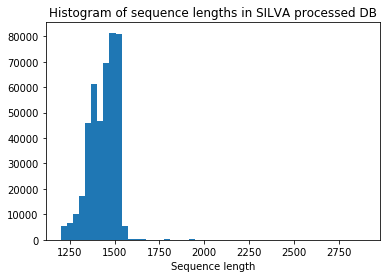

In [22]:
plt.hist(fasta_df.seq_length, bins = 50)
plt.title('Histogram of sequence lengths in SILVA processed DB')
plt.xlabel('Sequence length')
plt.show()

#### Taxonomy

Specifically: are there any taxa over-represented in the data?

In [58]:
species_counts = fasta_df[~fasta_df.species.isnull()].groupby('species').size().reset_index(name='appearances_in_db')
species_counts['appearances_in_db_bin'] = pd.cut(x=species_counts['appearances_in_db'], bins=[0,1,3,10,100,1000, 5000, 10000, 150000])
print(species_counts.groupby('appearances_in_db_bin').size().reset_index(name='number_of_species'))

  appearances_in_db_bin  number_of_species
0                (0, 1]              45818
1                (1, 3]               5975
2               (3, 10]               5413
3             (10, 100]               1686
4           (100, 1000]                143
5          (1000, 5000]                 14
6         (5000, 10000]                  1
7       (10000, 150000]                  2


In [59]:
print("Species appearing over 1K times in database:")
species_counts[species_counts.appearances_in_db > 1000]

Species appearing over 1K times in database:


,species,appearances_in_db,appearances_in_db_bin
5166,Bacillus cereus,1147,"(1000, 5000]"
7899,Bacillus subtilis,1586,"(1000, 5000]"
8877,Bordetella pertussis,1081,"(1000, 5000]"
17696,Escherichia coli,4007,"(1000, 5000]"
22752,Klebsiella pneumoniae,2463,"(1000, 5000]"
35972,Pseudomonas aeruginosa,1014,"(1000, 5000]"
44194,Staphylococcus aureus,1883,"(1000, 5000]"
56411,metagenome,5159,"(5000, 10000]"
56836,uncultured Alphaproteobacteria bacterium,1534,"(1000, 5000]"
56921,uncultured Bacteroidetes bacterium,1722,"(1000, 5000]"


In [60]:
genus_counts = fasta_df[~fasta_df.species.isnull()].groupby('genus').size().reset_index(name='appearances_in_db')
genus_counts['appearances_in_db_bin'] = pd.cut(x=genus_counts['appearances_in_db'], bins=[0,1,3,10,100,1000, 5000, 10000, 150000])
print(genus_counts.groupby('appearances_in_db_bin').size().reset_index(name='number_of_genera'))

  appearances_in_db_bin  number_of_genera
0                (0, 1]               100
1                (1, 3]               385
2               (3, 10]               786
3             (10, 100]              1482
4           (100, 1000]               463
5          (1000, 5000]                42
6         (5000, 10000]                 7
7       (10000, 150000]                 2


In [63]:
print("Genera appearing over 1K times in database:")
genus_counts[genus_counts.appearances_in_db > 1000].sort_values(by='appearances_in_db',ascending=False)

Genera appearing over 1K times in database:


,genus,appearances_in_db,appearances_in_db_bin
3264,uncultured,31671,"(10000, 150000]"
366,Bacillus,15700,"(10000, 150000]"
2388,Pseudomonas,9234,"(5000, 10000]"
1105,Escherichia-Shigella,7674,"(5000, 10000]"
2799,Streptococcus,7073,"(5000, 10000]"
2801,Streptomyces,6717,"(5000, 10000]"
2784,Staphylococcus,6416,"(5000, 10000]"
2636,Salmonella,5347,"(5000, 10000]"
1604,Lactobacillus,5272,"(5000, 10000]"
3119,Vibrio,3893,"(1000, 5000]"
